
![Image](https://images.newscientist.com/wp-content/uploads/2021/07/14141023/14-july_google-quantum-error.jpg)

# How Quantum Power Helps Win a Card Game

A quantum card game to illustrate the power of quantum superposition and interference.

Based on the work by [Jan-R. Lahmann](https://twitter.com/JanLahmann) using [Qiskit](http://qiskit.org).

Inspired by the TED talk of Shohini Ghose:   
["Quantum computing explained in 10 minutes"](https://www.ted.com/talks/shohini_ghose_quantum_computing_explained_in_10_minutes).


# The Card Game

Two players, Alice and Bob, play a card game.  

* The game starts with one card facing up, showing the King of Hearts.
* Alice starts and may either turn the card or leave it as is.
* Bob may now also turn the card or leave it as is.
* Alice then has the third and final move.
* However, the moves are hidden and have to be decided beforehand.
* Movements are applied to the card, and the final state is revealed.
* **If the card is UP, Alice wins; if the card is DOWN, Bob wins.**


**In summary:**

#### The card UP
![cardup](card.jpg)

#### The card DOWN
![carddown](card_reverse.jpg)

**If the card ends up, Alice wins. If it ends down, Bob Wins. All movements are done in secret.**

**Example 1**

Movement | Decision | Card
---------|----------|-----
1 (Alice) | Flip | ![cardup](card_reverse.jpg)
2 (Bob) | Flip | ![cardup](card.jpg)
3 (Alice) | Leave it | ![cardup](card.jpg)

__ALICE WINS__

**Example 2**

Movement | Decision | Card
---------|----------|-----
1 (Alice) | Leave it | ![cardup](card.jpg)
2 (Bob) | Flip | ![cardup](card_reverse.jpg)
3 (Alice) | Leave it | ![cardup](card_reverse.jpg)


__BOB WINS__

## Is there a strategy to always win the game?

Alice and Bob will win with the same probability.  
There is no strategy for Alice (or Bob) to increase this probability — and certainly no strategy to always win.

"Human" and "classical computer" players can only decide to "flip" the coin in their options. That means adding an "X" Gate to our circuit (or NOT, in the classical world).

However a quantum computer can use the superpower of superposition on its qubit (instead of a bit). For that, it may use "H-Gates" in addition to "X."

In [47]:
# Dependencies and initial configuration

%pylab inline
try:
    from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, transpile
    from qiskit_aer import AerSimulator
    from qiskit.visualization import plot_histogram
    from qiskit.circuit.library.standard_gates import HGate, IGate, XGate
    from ipywidgets import interact
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
except:
    !pip install -q -q -q qiskit==1.3.2 qiskit-aer==0.16.0 pylatexenc==2.10 qiskit-ibm-runtime==0.34.0
    from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, transpile
    from qiskit_aer import AerSimulator
    from qiskit.visualization import plot_histogram
    from qiskit.circuit.library.standard_gates import HGate, IGate, XGate
    from ipywidgets import interact
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [39]:
def MoveA1(move_A1): global moveA1; moveA1=move_A1;
def MoveB1(move_B1): global moveB1; moveB1=move_B1;
def MoveA2(move_A2): global moveA2; moveA2=move_A2;

def who_wins(counts):
    if len(counts)==1 :
        print('The winner is', 'Alice.' if ("0" in counts) else 'Bob.')
        if ("0" in counts):
            img = mpimg.imread('card.jpg')
        else:
            img = mpimg.imread('card_reverse.jpg')
        imgplot = plt.imshow(img)
        plt.axis('off')
        plt.show()
    else:
        count0=counts["0"]
        count1=counts["1"]
        print('The card is in superposition of |0⟩ and |1⟩')
        print('A wins with probability',  "%.1f%%" % (100.*count0/(count0+count1)))
        print('B wins with probability',  "%.1f%%" % (100.*count1/(count0+count1)))
    return()

def build_circuit():
    q = QuantumRegister(1, name="card") # Create a quantum register with one qubit.
    c = ClassicalRegister(1)
    qc = QuantumCircuit(q, c) # Create the quantum circuit.

    h = HGate(label='MAGIC')
    i = IGate(label='Do Nothing')
    x = XGate(label='Flip')

    # 1. move of A
    if   moveA1 == 0 : qc.append(i, [0]) #qc.i(q[0])
    elif moveA1 == 1 : qc.append(x, [0]) #qc.x(q[0])
    elif moveA1 == 2 : qc.append(h, [0]) #.h(q[0])

    # 1. move of B
    if   moveB1 == 0 : qc.append(i, [0])
    elif moveB1 == 1 : qc.append(x, [0])

    # 2. move of A
    if   moveA2 == 0 : qc.append(i, [0])
    elif moveA2 == 1 : qc.append(x, [0])
    elif moveA2 == 2 : qc.append(h, [0])

    qc.measure(q, c) # Measure the qubits.
    return qc

## Alice Starts

In [40]:
interact(MoveA1, move_A1={'Not Flip':0,'Flip':1});

interactive(children=(Dropdown(description='move_A1', options={'Not Flip': 0, 'Flip': 1}, value=0), Output()),…

## Bob Follows

In [41]:
interact(MoveB1, move_B1={'Not Flip':0,'Flip':1});

interactive(children=(Dropdown(description='move_B1', options={'Not Flip': 0, 'Flip': 1}, value=0), Output()),…

## Alice Moves Last

In [42]:
interact(MoveA2, move_A2={'Not Flip':0,'Flip':1});

interactive(children=(Dropdown(description='move_A2', options={'Not Flip': 0, 'Flip': 1}, value=0), Output()),…

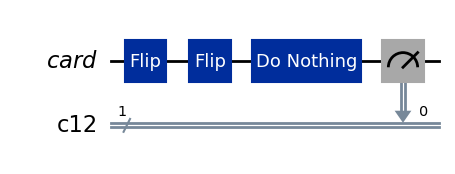

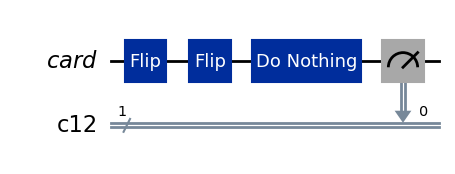

In [48]:
# The Quantum Circuit
qc = build_circuit()
qc.draw('mpl')


The winner is Alice.


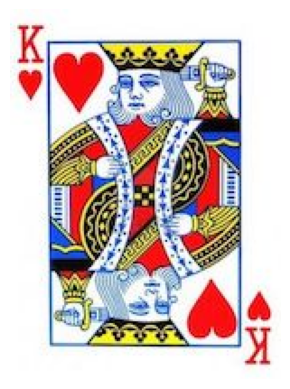

In [49]:
# Execute the quantum circuit (coin moves) and identify the winner.
backend = AerSimulator()
qc = transpile(qc, backend)
result = backend.run(qc).result()
counts = result.get_counts(qc)

#print(counts); # Print the results.
who_wins(counts); # Celebrate the winner.

## Now Alice is a quantum computer.

Bob is human, so only one movement is required.

In [50]:
interact(MoveB1, move_B1={'Not Flip':0,'Flip':1});

interactive(children=(Dropdown(description='move_B1', options={'Not Flip': 0, 'Flip': 1}, value=0), Output()),…

In [55]:
# A quantum computer uses superposition! (2 is a "Hadamard Gate")
MoveA1(2)
MoveA2(2)

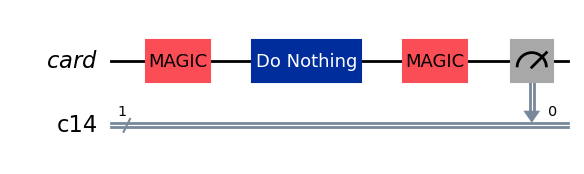

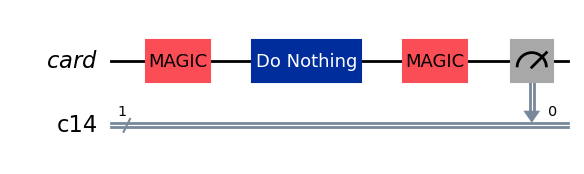

In [56]:
qcq = build_circuit()
qcq.draw('mpl')

{'0': 1024}
The winner is Alice.


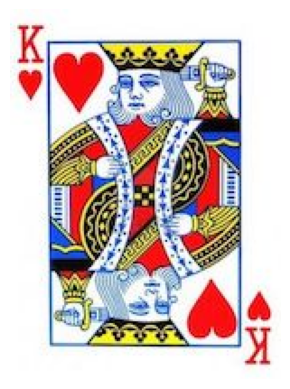

In [57]:
# Execute the quantum circuit (card moves) and identify the winner.
backend = AerSimulator()
qcq = transpile(qc, backend)
result = backend.run(qcq).result()
counts = result.get_counts(qcq)

print(counts); # Print the results.
who_wins(counts); # Celebrate the winner.

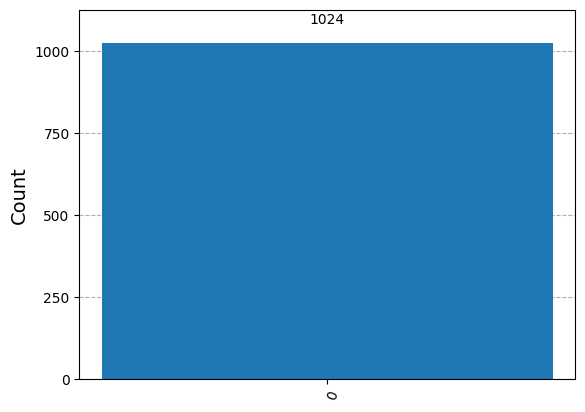

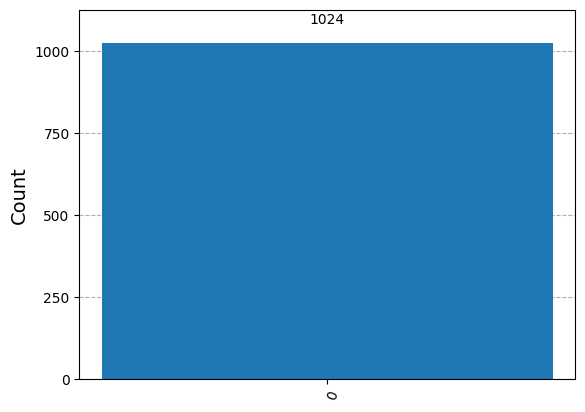

In [58]:
plot_histogram(counts) # Visualise the results.

## Here comes the noise.
Unfortunately, we live in the NISQ era (Noisy Intermediate-Scale Quantum Computers). This means our qubits are noisy, which greatly affects our calculations. We need to account for this fact.

{'1': 2, '0': 1022}
The card is in superposition of |0⟩ and |1⟩
A wins with probability 99.8%
B wins with probability 0.2%


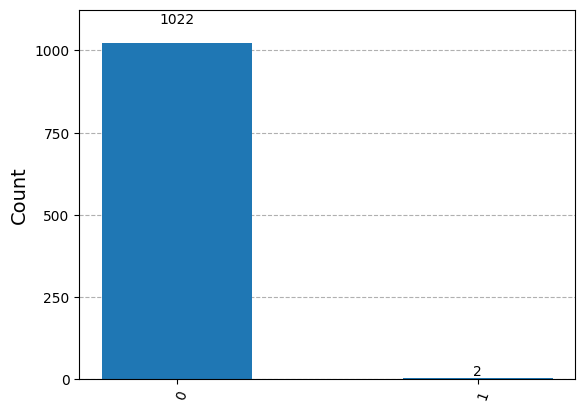

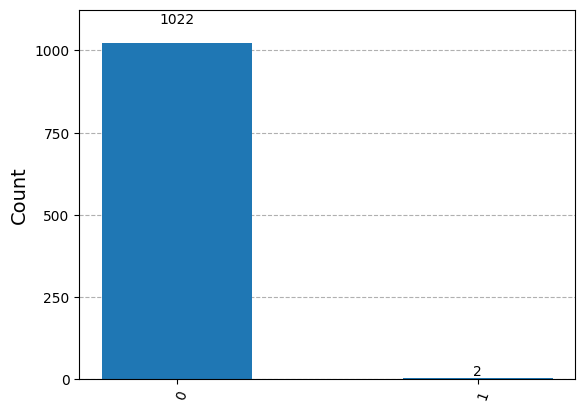

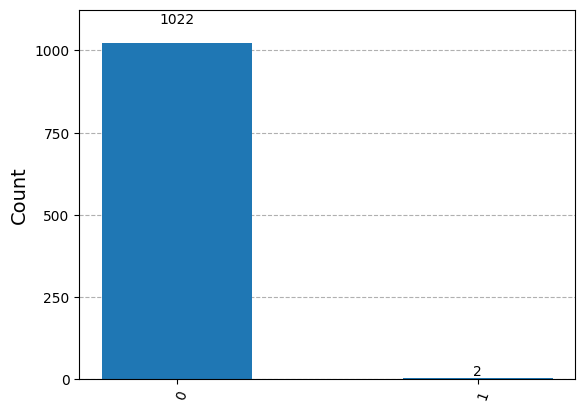

In [59]:
# Use the noise model of the 133-qubit ibm_torino superconducting quantum computer.
from qiskit_ibm_runtime.fake_provider import FakeTorino
fake_backend = FakeTorino()

# Transpile the circuit for noisy basis gates.
noisy_qcq = transpile(qcq, fake_backend)

# Run and get counts.
noisy_result = fake_backend.run(noisy_qcq).result()
noisy_counts = noisy_result.get_counts(0)

# Plot the noisy output.
plot_histogram(noisy_counts)

print(noisy_counts); # Print the results.
who_wins(noisy_counts); # Celebrate the winner.
plot_histogram(noisy_counts) # Visualise the results.